# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

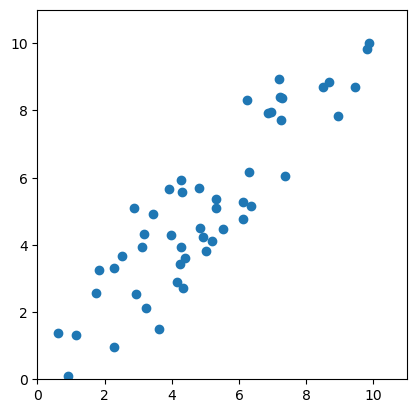

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal', 'box')
ax.set(xlim=(0,11), ylim=(0,11))

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
plt.scatter(x = df.p1, y = df.p2)

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [2]:
# Convertendo e transpondo dataframe para uso do Numpy
matriz_dados = df.to_numpy().T

# Calculando a média e a diferença usando multiplicação matricial
df['media'] = np.dot(np.array([[0.5, 0.5]]), matriz_dados).flatten() # flatten é um análogo ao ravel()
df['diferenca'] = np.dot(np.array([[1, -1]]), matriz_dados).flatten()

df

,p1,p2,media,diferenca
0,6.964692,7.943428,7.454060,-0.978736
1,2.861393,5.099537,3.980465,-2.238143
2,2.268515,0.974429,1.621472,1.294085
3,5.513148,4.474359,4.993754,1.038788
4,7.194690,8.938402,8.066546,-1.743712
5,4.231065,3.433002,3.832033,0.798063
6,9.807642,9.837325,9.822484,-0.029683
7,6.848297,7.917613,7.382955,-1.069316
8,4.809319,5.700025,5.254672,-0.890706
9,3.921175,5.676061,4.798618,-1.754886


b) Calcule a correlação entre os dados da **p1** e **p2**

In [3]:
correlacao_original = df[['p1', 'p2']].corr() # uso o método corr() praticamente todos os dias no meu trabalho
correlacao_original.style.format(precision=2)

,p1,p2
p1,1.00,0.90
p2,0.90,1.00


c) Calcule a correlação entre os dados transformados (média e diferença).

In [4]:
correlacao_transform = df[['media', 'diferenca']].corr()
correlacao_transform.style.format(precision=2)

,media,diferenca
media,1.00,-0.13
diferenca,-0.13,1.00


d) Comente as correlações observadas.

> A correlação entre as variáveis originais indica uma forte correlação positiva. Isso significa que há uma relação linear positiva entre as notas da 'p1' e 'p2', ou seja, quando uma variável aumenta, a outra também tende a aumentar. Na realidade, isso era esperado, exatamente pelo modo em que foram instrísicamente atreladas, onde a 'p2' é literalmente a 'p1' somada de um valor, ou seja, ela contém a 'p1' em seu núcleo informativo.
>
> A correlação entre "média" e "diferença" é de -0.13. Isso sugere uma correlação negativa fraca entre essas variáveis. Quando a média aumenta, a diferença tende a diminuir, e vice-versa. No entanto, a correlação é relativamente baixa, indicando que a relação linear entre essas variáveis não é forte. O valor resultante, é próximo ao complementar da correlação original, o que nos leva a notar que o modo em que essas transformações foram construídas são praticamente opostas em direção e magnitude a correlação original.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [5]:
# Esse método np.dot(np.array[constantes para transformação]) facilita muito o uso Transformações
# quando se entende da matemática por trás da Alg Lin
df['soma'] = np.dot(np.array([[1, 1]]), matriz_dados).flatten()
df

,p1,p2,media,diferenca,soma
0,6.964692,7.943428,7.454060,-0.978736,14.908120
1,2.861393,5.099537,3.980465,-2.238143,7.960930
2,2.268515,0.974429,1.621472,1.294085,3.242944
3,5.513148,4.474359,4.993754,1.038788,9.987507
4,7.194690,8.938402,8.066546,-1.743712,16.133092
5,4.231065,3.433002,3.832033,0.798063,7.664066
6,9.807642,9.837325,9.822484,-0.029683,19.644967
7,6.848297,7.917613,7.382955,-1.069316,14.765911
8,4.809319,5.700025,5.254672,-0.890706,10.509344
9,3.921175,5.676061,4.798618,-1.754886,9.597237
